In [2]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [5]:
dist = pd.read_csv('dist_matrix.tsv', sep='\t', index_col=0)
dist

,AA,AC,AG,AT,CA,CC,CG,CT,GA,GC,GG,GT,TA,TC,TG,TT
E.coli,0.0730,0.0552,0.0511,0.0668,0.0698,0.0584,0.0747,0.0511,0.0576,0.0828,0.0584,0.0552,0.0457,0.0576,0.0698,0.0730
D.melanogaster,0.1017,0.0526,0.0544,0.0813,0.0679,0.0463,0.0413,0.0544,0.0557,0.0554,0.0463,0.0526,0.0646,0.0557,0.0679,0.1017
A.thaliana,0.1156,0.0523,0.0595,0.0924,0.0635,0.0339,0.0235,0.0595,0.0641,0.0300,0.0339,0.0523,0.0766,0.0641,0.0635,0.1156
S.cerevisiae,0.1084,0.0525,0.0582,0.0902,0.0645,0.0388,0.0292,0.0582,0.0621,0.0373,0.0388,0.0525,0.0743,0.0621,0.0645,0.1084
C.elegans,0.1354,0.0483,0.0506,0.0885,0.0619,0.0335,0.0312,0.0506,0.0621,0.0333,0.0335,0.0483,0.0634,0.0621,0.0619,0.1354
B.subtilis,0.0987,0.0462,0.0561,0.0814,0.0666,0.0458,0.0490,0.0561,0.0654,0.0603,0.0458,0.0462,0.0517,0.0654,0.0666,0.0987
H.salinarum,0.0274,0.0682,0.0458,0.0289,0.0514,0.0851,0.1474,0.0458,0.0747,0.1017,0.0851,0.0682,0.0168,0.0747,0.0514,0.0274
G.gallus,0.0940,0.0519,0.0723,0.0707,0.0767,0.0500,0.0120,0.0723,0.0595,0.0496,0.0500,0.0519,0.0589,0.0595,0.0767,0.0940
M.musculus,0.0913,0.0533,0.0734,0.0738,0.0745,0.0522,0.0083,0.0734,0.0622,0.0406,0.0522,0.0533,0.0638,0.0622,0.0745,0.0913
D.rerio,0.1106,0.0565,0.0572,0.0926,0.0732,0.0348,0.0179,0.0572,0.0525,0.0392,0.0348,0.0565,0.0806,0.0525,0.0732,0.1106


C:\Users\nadia\AppData\Local\Temp\ipykernel_19188\479999772.py:8: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage_matrix = linkage(dist_matrix, method='ward')


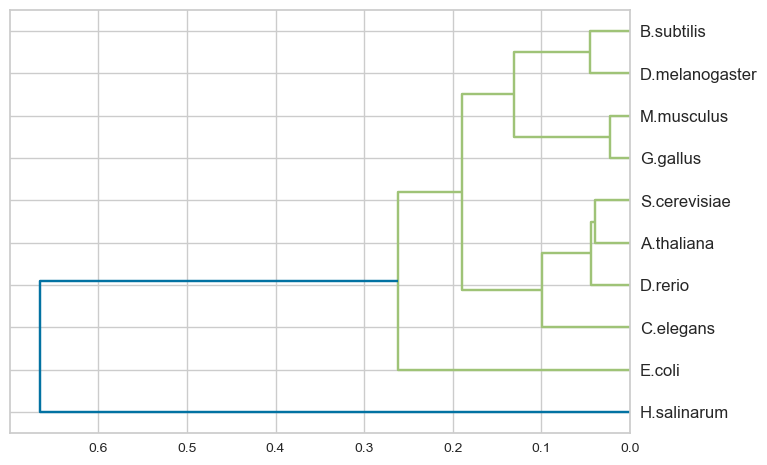

In [14]:
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage, dendrogram


dist_matrix = pdist(dist,metric='euclidean')
dist_matrix = squareform(dist_matrix)

linkage_matrix = linkage(dist_matrix, method='ward')
d = dendrogram(linkage_matrix, labels=list(dist.index), orientation='left')

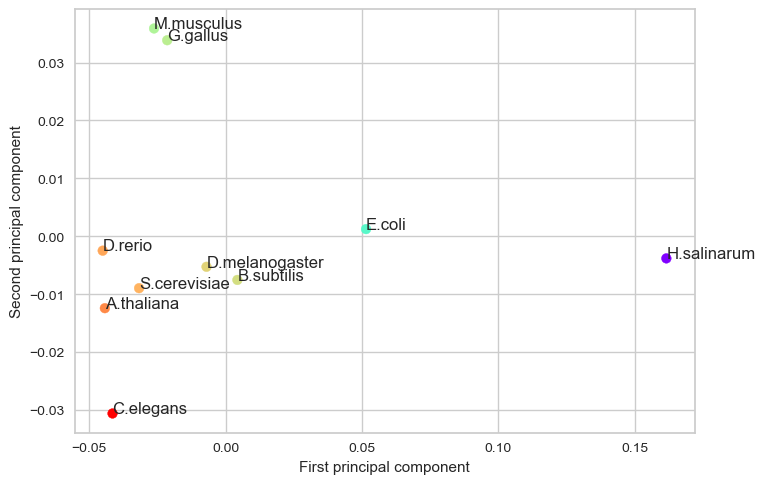

In [19]:
X = dist.iloc[:, :-1].values
y = dist.iloc[:, -1].values

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)


plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='rainbow')
plt.xlabel('First principal component')
plt.ylabel('Second principal component')

for i, label in enumerate(dist.index):
    plt.text(X_pca[i, 0], X_pca[i, 1], label)


plt.show()
